### 1. Train the Two Tower network

In [1]:
%load_ext autoreload
%autoreload 2
from utils.utils import *
from utils.utils_train import *


In [2]:
# Load Embeddings Data
queries, query_embeddings, product_embeddings = load_raw_queries()

# load ids_toys from disk
with open('output/ids_toys.pkl', 'rb') as file:
    ids_toys = pickle.load(file)
    print(len(ids_toys))
    ids_present = [_id for _id in ids_toys if _id in query_embeddings]

# Assemble qb & xb input embeddings
qb = torch.stack([torch.tensor(query_embeddings[_id]) for _id in ids_present])
xb = torch.tensor(np.array([product_embeddings[_id] for _id in ids_present]))

# Split Dataset into Train and Test
(qb_train, qb_test), (xb_train, xb_test), (idx_train, idx_test) = shuffle_and_split(qb, xb, seed=12)
print('qb_train.shape:', qb_train.shape)
print('qb_test.shape:', qb_test.shape)


loaded (queries, query_embeddings, product_embeddings) from  output/raw_queries.pkl
84373
qb_train.shape: torch.Size([20560, 768])
qb_test.shape: torch.Size([5140, 768])


### Two-Tower Pytorch Model

In [3]:
d = hidden_dim = qb.shape[-1]
learning_rate = 0.0001

# Initialize the network
model = TwoTowerNetwork(d, hidden_dim, learning_rate=learning_rate)

list_recall3 = []
list_test_epochs = []

recall@3  = 0.288                    
recall@3  = 0.291                    
recall@3  = 0.266                    
recall@3  = 0.250                    
recall@3  = 0.287                    
recall@3  = 0.235                    
recall@3  = 0.269                    
recall@3  = 0.251                    
recall@3  = 0.274                    
recall@3  = 0.266                    
recall@3  = 0.266                    
recall@3  = 0.278                    
recall@3  = 0.287                    
recall@3  = 0.283                    
recall@3  = 0.268                    
recall@3  = 0.264                    
recall@3  = 0.285                    
recall@3  = 0.268                    
recall@3  = 0.289                    
recall@3  = 0.287                    
recall@3  = 0.290                    
recall@3  = 0.273                    
recall@3  = 0.286                    
recall@3  = 0.287                    
recall@3  = 0.265                    


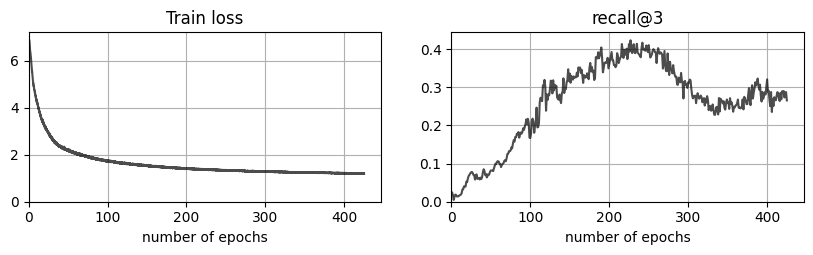

recall@3  = 0.284                    
recall@3  = 0.287                    
recall@3  = 0.286                    
recall@3  = 0.291                    
recall@3  = 0.324                    
recall@3  = 0.295                    
recall@3  = 0.285                    
recall@3  = 0.287                    
recall@3  = 0.281                    
recall@3  = 0.293                    
recall@3  = 0.276                    
recall@3  = 0.282                    
recall@3  = 0.273                    
recall@3  = 0.304                    
recall@3  = 0.289                    
recall@3  = 0.277                    
recall@3  = 0.294                    
recall@3  = 0.282                    
recall@3  = 0.285                    
recall@3  = 0.292                    
recall@3  = 0.302                    


KeyboardInterrupt: 

In [6]:
## TRAIN
# Hyperparameters
batch_size = 1024 
num_epochs = 1
label_smoothing = 0.1

for i in range(100):
    (qb_train, _), (xb_train, _), (_) = shuffle_and_split(qb_train, xb_train, split=1)
    
    model.train(qb_train, xb_train, num_epochs, batch_size, label_smoothing)
    write_output_embeddings(model, qb_test, xb_test) 
    os.system('cd utils && python3 utils_infer.py')
    with open('output/recall3.json', 'r') as file:
        out = json.load(file)
    recall3 = out['recall3']
    list_test_epochs.append(model.epochs[-1])
    list_recall3.append(recall3) 
    
    if (i+1) % 25 == 0:
        model.plot(qb_train, batch_size, list_test_epochs, list_recall3)
    plt.show()


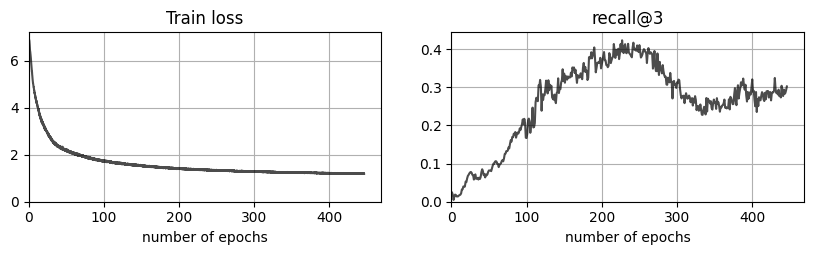

In [7]:
model.plot(qb_train, batch_size, list_test_epochs, list_recall3)


In [ ]:
# TODO:
# 1. figure out how to incorporate a learning_rate scheduler
# 2. print the top 3 results for hits. 

### The End

In [ ]:
# Load queries, ids_toys, ids_present
with open('output/raw_queries.pkl', 'rb') as file:
    queries, _, _ = pickle.load(file)

with open('output/ids_toys.pkl', 'rb') as file:
    ids_toys = pickle.load(file)
    ids_present = [_id for _id in ids_toys if _id in query_embeddings]


In [5]:
top_ids = [ids_present[idx_test[i]] for i in I[0]]
names = [info[_id]['name'] for _id in top_ids]
details = [info[_id]['details'] for _id in top_ids]
description = [info[_id]['description'] for _id in top_ids]
queries[ids_present[idx_test[0]]]

"I need to buy a Super-duper Tutu/Cape/Mask set in size 4-6 for my 4-6-year-old. It's a 3-piece set perfect for little Superheroines and Rock Stars!"